In [25]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as py
from mlxtend.frequent_patterns import apriori,association_rules
import seaborn as sns
os.chdir("C:\\Users\\sudramak\\Anaconda-DS\\SuperDS projects\\Market Basket Analysis")
os.listdir()

['.ipynb_checkpoints', 'MBA.csv', 'MBA.ipynb', 'Online Retail.xlsx']

In [2]:
mba = pd.read_csv("MBA.csv")
mba['Quantity']=1

In [3]:
df = mba.groupby(by=['transaction_id','item_name'])['Quantity'].sum().unstack().fillna(0).reset_index().set_index('transaction_id')

In [4]:
def encode(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
df_basket = df.applymap(encode)
pd.DataFrame()

In [34]:
frequent_items = pd.DataFrame(index=None)
frequent_items = apriori(df_basket,min_support=0.03,use_colnames=True)

In [66]:
frequent_item = frequent_items[frequent_items['support']>0.15]

In [68]:
frequent_item.head()

,support,itemsets
1,0.159396,[Apple Pie]
2,0.163087,[Bannana]
3,0.157718,[Brown Bread]
4,0.152349,[Butter]
6,0.160403,[Chocolate Cake]


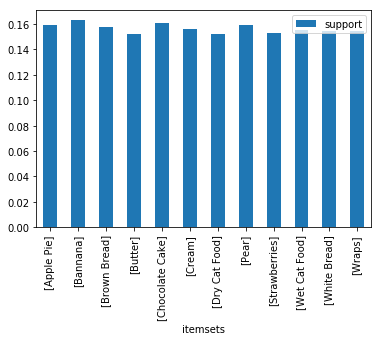

In [67]:
ax = frequent_item.plot.bar(x='itemsets',y='support')
py.show()

In [7]:
rules = pd.DataFrame()
rules = association_rules(frequent_items,metric='lift',min_threshold=1)

In [8]:
rules.sort_values(by=['lift'],ascending=False).tail(5)

,antecedants,consequents,support,confidence,lift
76,(White Bread),(Chocolate Cake),0.154362,0.195652,1.219756
30,(Strawberries),(Bannana),0.153020,0.197368,1.210201
31,(Bannana),(Strawberries),0.163087,0.185185,1.210201
42,(Brown Bread),(Chocolate Cake),0.157718,0.193617,1.207068
43,(Chocolate Cake),(Brown Bread),0.160403,0.190377,1.207068
